# 1. Overview

This project analyzes aircraft accidents and incidents from 1948 to 2022.
It is part of the initial phase of the FlatIron Data Science bootcamp, with the requirement to investigate the provided dataset.
The goal is to derive three business recommendations for strategic investments in the aircraft industry.
The business problem is to identify low-risk aircraft for a company looking to expand into commercial and private aviation.

# 2. Business Understanding 

The main objective is to discern which aircraft present the lowest risk for the company's venture into aviation.
This expansion requires a thorough risk assessment to make informed decisions on aircraft acquisition.
The findings will be translated into actionable insights for the head of the new aviation division to guide purchase decisions.
The investigation centers on assessing the risk profiles of various aircraft, with the aim of providing three informed business recommendations.
These recommendations will specifically address which types of aircraft the company should consider for investment based on historical safety data.
The ultimate goal is to guide the company towards aircraft options that minimize risk and potential liability, thereby supporting safe and sound investment decisions in the aviation sector.

Our primary stakeholders are the board members of the company as they are the ones to decide whether to carry out the investment or not.

# 3. Data Understanding

## 3.1 Data Description

For the project, the data source is drawn from Kaggle, which encompasses a comprehensive collection of aircraft accidents and incidents. The timeline of this dataset spans an extensive period, covering events from the year 1948 through to 2022.

The dataset has undergone a meticulous cleaning procedure to ensure the quality and relevance of the data. This process included a filter to retain only those incidents and accidents that occurred within the United States. Additionally, the data was refined by filtering out events to include only those that resulted in fatal injuries or serious injuries, thus focusing on the most severe occurrences.

Now let's dive into the data to better understand it and arrive to the business recommendations.

## 3.2 SetUp 

## 3.3 Import necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
pd.set_option('display.max_columns', 500)

## 3.4 Define global variables

In [4]:
INPUT_PATH = "../../Data_Project_Phase1/AviationData.csv"

In [5]:
!pwd

/c/Users/Usuario/Desktop/FlatIron/DataScience_FlatIron_Curso/Phase_1/Phase1-Project/Aircraft_safety_analysis/notebooks


## 3.5 Functions

In [6]:
def categorize_data(column):
    """
    Function: This function will return the string 'zero' if the value of the argument (ie 'column') is 0 and will return 
    'one or more' if the value of 'column' is not zero
    
    Argument (data series): The column to evaluate
    
    Result (string): The category label for the value
    
    """
    if column==0:
        return 'Zero'
    elif pd.isna(column):
        return 'Unknown'
    else:
        return 'One or More'
    

In [7]:
def plot_bar_graph_for_columns(columns):
    
    """
    Function: This function creates a bar graph for a column.

    Argument (data series): The columns to evaluate. 
 
    Returns: Bar plot for the column
     
    """
    
    plt.figure()
    df[columns].value_counts().plot(kind='bar')
    plt.xlabel(columns)
    plt.ylabel('Frequency')
    plt.xticks(rotation=90)
    plt.title(f'Bar Graph of {columns}')
 
    

In [8]:
def plot_column_data(df, column, kind_of_graph):
    
    """
    Function: This function creates a value_counts and the desired graph for a column.

    Argument (data series): The data frame, the coolumn and the kind of graph wished to be plotted
 
    Returns: Value_counts of the column and the desired graph representation
    """
     
    # Print the normalized value counts including NaN values
    value_counts = df[column].value_counts(normalize=True, dropna=False)
    print(value_counts)
    print()
    
    # Plot the graph
    if kind_of_graph == 'bar':
        plt.figure()
        value_counts.plot(kind='bar')
    elif kind_of_graph == 'pie':
        plt.figure()
        value_counts.plot(kind='pie')
    elif kind_of_graph == 'line':
        plt.figure()
        value_counts.plot(kind='line')

    # Show the plot
    plt.title(f'Graph of {column}')
    plt.ylabel('Frequency')
    plt.xlabel(column)
    plt.xticks(rotation=90)
    plt.show();



In [9]:
def plot_feature(df: pd.DataFrame, 
                 column_name: str, 
                 column_type: str, 
                 variable_target1: str,
                 variable_target2: str):
    """
    Visualize a variable with faceting on two target variables.
    
    Parameters:
        df (pd.DataFrame): The dataframe containing the data.
        column_name (str): The name of the column to be visualized.
        column_type (str): The type of the column ('continuous' or 'categorical').
        variable_target1 (str): The name of the first target variable for faceting.
        variable_target2 (str): The name of the second target variable for faceting.
    """
    f, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(18,6), dpi=90)
    
    # Plot without target variables
    if column_type == 'continuous':
        sns.distplot(df.loc[df[column_name].notnull(), column_name], kde=False, ax=ax1)
    else:
        categories_to_consider = list(df[column_name].value_counts().index[:15])
        df = df[df[column_name].isin(categories_to_consider)]
        sns.countplot(x=df[column_name], order=sorted(categories_to_consider),
                      color='#5975A4', saturation=1, ax=ax1)
    ax1.set_xlabel(column_name)
    ax1.set_ylabel('Count')
    ax1.set_title(f"Distribution of {column_name}")
    ax1.tick_params(axis='x', rotation=90)

    # Plot with the first target variable
    if column_type == "continuous":
        sns.boxplot(x=column_name, y=variable_target1, data=df, ax=ax2)
    else:
        data = df.groupby(column_name)[variable_target1].value_counts(normalize=True).unstack().fillna(0)
        data.plot(kind='bar', stacked=True, ax=ax2)
    ax2.set_ylabel(f"Proportion of {variable_target1}")
    ax2.set_title(f"{column_name} by {variable_target1}")
    ax2.tick_params(axis='x', rotation=90)

    # Plot with the second target variable
    if column_type == "continuous":
        sns.boxplot(x=column_name, y=variable_target2, data=df, ax=ax3)
    else:
        data = df.groupby(column_name)[variable_target2].value_counts(normalize=True).unstack().fillna(0)
        data.plot(kind='bar', stacked=True, ax=ax3)
    ax3.set_ylabel(f"Proportion of {variable_target2}")
    ax3.set_title(f"{column_name} by {variable_target2}")
    ax3.tick_params(axis='x', rotation=90)
    
    plt.tight_layout()
    plt.show()


## 3.6 Code

In [10]:
df = pd.read_csv(INPUT_PATH, encoding="latin-1")
df

C:\Users\Usuario\AppData\Local\Temp\ipykernel_22212\281516245.py:1: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(INPUT_PATH, encoding="latin-1")


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,NC6404,Stinson,108-3,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,Fatal(4),Destroyed,NaN,N5069P,Piper,PA24-180,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,Fatal(3),Destroyed,NaN,N5142R,Cessna,172M,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,N1168J,Rockwell,112,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,Fatal(1),Destroyed,NaN,N15NY,Cessna,501,No,NaN,NaN,NaN,NaN,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,Minor,NaN,NaN,N1867H,PIPER,PA-28-151,No,NaN,NaN,091,NaN,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N2895Z,BELLANCA,7ECA,No,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,Non-Fatal,Substantial,Airplane,N749PJ,AMERICAN CHAMPION AIRCRAFT,8GCBC,No,1.0,NaN,091,NaN,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N210CU,CESSNA,210N,No,NaN,NaN,091,NaN,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [11]:
print(f"This dataset has {df.shape[0]} rows and {df.shape[1]} columns")

This dataset has 88889 rows and 31 columns


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

Now, I am going to clean the column names by making them be in lower case and using an underscore

In [13]:
df.columns = df.columns.str.lower().str.replace('.', '_')
df.columns

Index(['event_id', 'investigation_type', 'accident_number', 'event_date',
       'location', 'country', 'latitude', 'longitude', 'airport_code',
       'airport_name', 'injury_severity', 'aircraft_damage',
       'aircraft_category', 'registration_number', 'make', 'model',
       'amateur_built', 'number_of_engines', 'engine_type', 'far_description',
       'schedule', 'purpose_of_flight', 'air_carrier', 'total_fatal_injuries',
       'total_serious_injuries', 'total_minor_injuries', 'total_uninjured',
       'weather_condition', 'broad_phase_of_flight', 'report_status',
       'publication_date'],
      dtype='object')

In [14]:
df

,event_id,investigation_type,accident_number,event_date,location,country,latitude,longitude,airport_code,airport_name,injury_severity,aircraft_damage,aircraft_category,registration_number,make,model,amateur_built,number_of_engines,engine_type,far_description,schedule,purpose_of_flight,air_carrier,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight,report_status,publication_date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,NC6404,Stinson,108-3,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,Fatal(4),Destroyed,NaN,N5069P,Piper,PA24-180,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,Fatal(3),Destroyed,NaN,N5142R,Cessna,172M,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,N1168J,Rockwell,112,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,Fatal(1),Destroyed,NaN,N15NY,Cessna,501,No,NaN,NaN,NaN,NaN,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,Minor,NaN,NaN,N1867H,PIPER,PA-28-151,No,NaN,NaN,091,NaN,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N2895Z,BELLANCA,7ECA,No,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,Non-Fatal,Substantial,Airplane,N749PJ,AMERICAN CHAMPION AIRCRAFT,8GCBC,No,1.0,NaN,091,NaN,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N210CU,CESSNA,210N,No,NaN,NaN,091,NaN,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


### 3.6.1 Descriptive Statistics

In [15]:
df.describe()

,number_of_engines,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


Even though Number of Engines is continuous, it could be considered as descrete because it doesn't make much sense to talk about a mean of 1.14 of number of engines. 

Other noticeable things are that there is a mean of almost 1 total fatal injury for all the accidents, and data seems to be coherent because there aren't negative values. 

### 3.6.2 Making a primary key

In [16]:
df['event_id'].value_counts()

event_id
20001212X19172    3
20001214X45071    3
20220730105623    2
20051213X01965    2
20001212X16765    2
                 ..
20001211X14216    1
20001211X14239    1
20001211X14207    1
20001211X14204    1
20221230106513    1
Name: count, Length: 87951, dtype: int64

In [17]:
df['accident_number'].value_counts()

accident_number
CEN22LA149    2
WPR23LA041    2
WPR23LA045    2
DCA22WA214    2
DCA22WA089    2
             ..
LAX92FA065    1
ANC92T#A12    1
MIA92LA049    1
NYC92LA048    1
ERA23LA097    1
Name: count, Length: 88863, dtype: int64

In [18]:
df['registration_number'].value_counts()

registration_number
NONE      344
UNREG     126
UNK        13
USAF        9
N20752      8
         ... 
N93478      1
N519UA      1
N8840W      1
N21040      1
N9026P      1
Name: count, Length: 79104, dtype: int64

In [19]:
df[df['accident_number']=='CEN22LA149']

,event_id,investigation_type,accident_number,event_date,location,country,latitude,longitude,airport_code,airport_name,injury_severity,aircraft_damage,aircraft_category,registration_number,make,model,amateur_built,number_of_engines,engine_type,far_description,schedule,purpose_of_flight,air_carrier,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight,report_status,publication_date
87548,20220323104818,Accident,CEN22LA149,2022-03-18,"Grapevine, TX",United States,032530N,0097251W,DFW,Dallas Ft. Worth,Non-Fatal,Substantial,Airplane,N78SA,CESSNA,208B,No,1.0,Turbo Prop,135,NSCH,Business,MARTINAIRE AVIATION LLC,0.0,0.0,0.0,2.0,VMC,NaN,The failure of the pilot of the second aircraf...,05-07-2022
87549,20220323104818,Accident,CEN22LA149,2022-03-18,"Grapevine, TX",United States,032530N,0097251W,DFW,Dallas Ft. Worth,Non-Fatal,Substantial,Airplane,N9469B,CESSNA,208B,No,1.0,Reciprocating,135,NSCH,Business,MARTINAIRE AVIATION LLC,0.0,0.0,0.0,2.0,VMC,NaN,The failure of the pilot of the second aircraf...,05-07-2022


In [20]:
df['primary_key'] = df['accident_number'] + '_' + df['registration_number']
df

,event_id,investigation_type,accident_number,event_date,location,country,latitude,longitude,airport_code,airport_name,injury_severity,aircraft_damage,aircraft_category,registration_number,make,model,amateur_built,number_of_engines,engine_type,far_description,schedule,purpose_of_flight,air_carrier,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight,report_status,publication_date,primary_key
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,NC6404,Stinson,108-3,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN,SEA87LA080_NC6404
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,Fatal(4),Destroyed,NaN,N5069P,Piper,PA24-180,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996,LAX94LA336_N5069P
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,Fatal(3),Destroyed,NaN,N5142R,Cessna,172M,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007,NYC07LA005_N5142R
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,N1168J,Rockwell,112,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000,LAX96LA321_N1168J
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,Fatal(1),Destroyed,NaN,N15NY,Cessna,501,No,NaN,NaN,NaN,NaN,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980,CHI79FA064_N15NY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,Minor,NaN,NaN,N1867H,PIPER,PA-28-151,No,NaN,NaN,091,NaN,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022,ERA23LA093_N1867H
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N2895Z,BELLANCA,7ECA,No,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,ERA23LA095_N2895Z
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,Non-Fatal,Substantial,Airplane,N749PJ,AMERICAN CHAMPION AIRCRAFT,8GCBC,No,1.0,NaN,091,NaN,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022,WPR23LA075_N749PJ
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N210CU,CESSNA,210N,No,NaN,NaN,091,NaN,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,WPR23LA076_N210CU


In [21]:
df['primary_key'].value_counts()

primary_key
SEA87LA080_NC6404     1
SEA05CA166_N2094K     1
CHI05CA172_N7446      1
DEN05CA122_N2584B     1
DEN05LA121_N5754S     1
                     ..
MIA91LA225_N2983U     1
ATL91LA180_N62108     1
ATL91LA181A_N26004    1
ATL91LA181B_N67174    1
ERA23LA097_N9026P     1
Name: count, Length: 87507, dtype: int64

We haven't found a primary key, but I have created one by combining 2 columns: accident_number and registration_number

### 3.6.3 Duplicates study

Checking for duplicates

In [22]:
df.duplicated().sum()

0

### 3.6.4 Null-values analysis

Checking for null values

In [23]:
df.isnull().sum()/len(df)*100

event_id                   0.000000
investigation_type         0.000000
accident_number            0.000000
event_date                 0.000000
location                   0.058500
country                    0.254250
latitude                  61.320298
longitude                 61.330423
airport_code              43.601570
airport_name              40.708074
injury_severity            1.124999
aircraft_damage            3.593246
aircraft_category         63.677170
registration_number        1.554748
make                       0.070875
model                      0.103500
amateur_built              0.114750
number_of_engines          6.844491
engine_type                7.982990
far_description           63.974170
schedule                  85.845268
purpose_of_flight          6.965991
air_carrier               81.271023
total_fatal_injuries      12.826109
total_serious_injuries    14.073732
total_minor_injuries      13.424608
total_uninjured            6.650992
weather_condition          5

I will proceed to create a list to drop certain columns that have too many null values and that I perceive not to be usefull for the analysis.

Latitude, Longitude, airpot_code, airport_name, and publication_date I decide to drop mainly because they are not useful for the case study. 
Schedule and air_carrier I decide to drop because they have more than 80% of null values

In [24]:
drop_columns = ['latitude','longitude','airport_code','airport_name','schedule','air_carrier','publication_date']

Now I will study other columns that have a high percent of null values to determine whether they still can give good insights. These columns are: aircraft_category, far_description, and broad_phase_of_flight

**Aircraft_category**

aircraft_category
NaN                  0.636772
Airplane             0.310691
Helicopter           0.038700
Glider               0.005715
Balloon              0.002599
Gyrocraft            0.001946
Weight-Shift         0.001811
Powered Parachute    0.001024
Ultralight           0.000337
Unknown              0.000157
WSFT                 0.000101
Powered-Lift         0.000056
Blimp                0.000045
UNK                  0.000022
Rocket               0.000011
ULTR                 0.000011
Name: proportion, dtype: float64



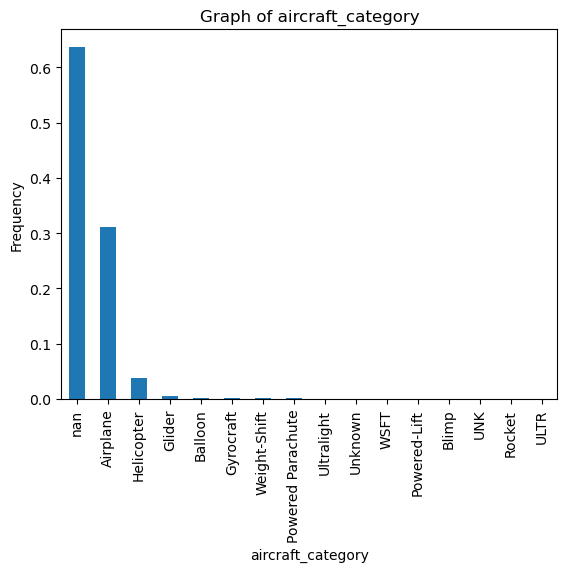

In [25]:
plot_column_data(df,'aircraft_category', 'bar')

It's observable that only the airplanes and the helicopters have considerable numbers of registrations in the aircraft category.
Moreover, as can be seen most of the aircrafts are airplanes. Given that there 64% of NaN values, I will drop this column too

In [26]:
drop_columns.append('aircraft_category')

### 3.6.5 Further study of the rest of the columns

**Far Description column**

far_description
NaN                               0.639742
091                               0.204986
Part 91: General Aviation         0.072967
NUSN                              0.017820
NUSC                              0.011396
137                               0.011362
135                               0.008392
121                               0.007639
Part 137: Agricultural            0.004916
UNK                               0.004174
Part 135: Air Taxi & Commuter     0.003352
PUBU                              0.002846
129                               0.002767
Part 121: Air Carrier             0.001856
133                               0.001204
Part 129: Foreign                 0.001125
Non-U.S., Non-Commercial          0.001091
Non-U.S., Commercial              0.001046
Part 133: Rotorcraft Ext. Load    0.000360
Unknown                           0.000247
Public Use                        0.000214
091K                              0.000157
ARMF                              0.00

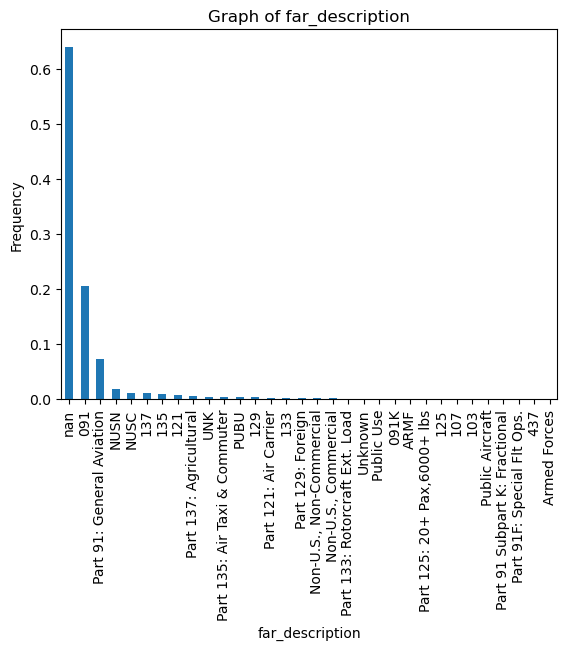

In [27]:
plot_column_data(df,'far_description', 'bar')

I interpret that the 091 and Part 91: General Aviation are the same norm of aviation. Basing myself in these research:

https://www.risingup.com/fars/info/

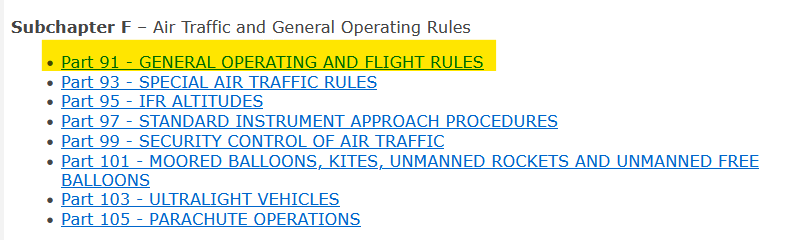

I will proceed to join both of these values and print the result

far_description
NaN                               0.639742
Part 91 - General Aviation        0.278133
NUSN                              0.017820
NUSC                              0.011396
137                               0.011362
135                               0.008392
121                               0.007639
Part 137: Agricultural            0.004916
UNK                               0.004174
Part 135: Air Taxi & Commuter     0.003352
PUBU                              0.002846
129                               0.002767
Part 121: Air Carrier             0.001856
133                               0.001204
Part 129: Foreign                 0.001125
Non-U.S., Non-Commercial          0.001091
Non-U.S., Commercial              0.001046
Part 133: Rotorcraft Ext. Load    0.000360
Unknown                           0.000247
Public Use                        0.000214
ARMF                              0.000090
125                               0.000056
Part 125: 20+ Pax,6000+ lbs       0.00

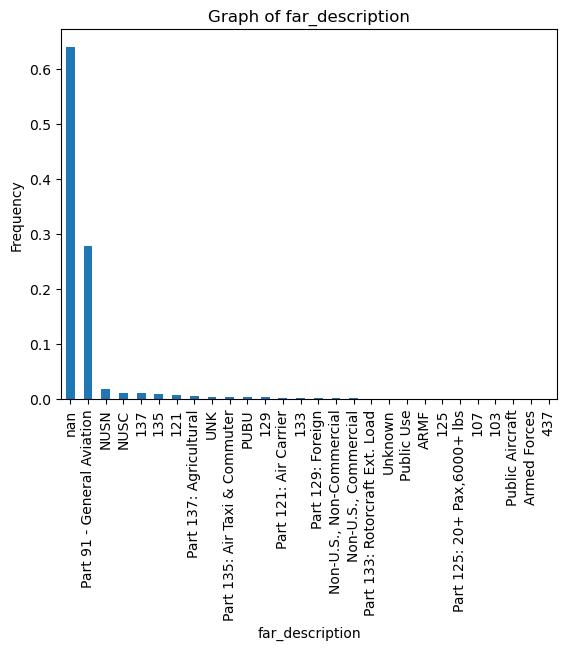

In [28]:
df['far_description'] = df['far_description'].map(lambda x: 'Part 91 - General Aviation' if isinstance(x,str) and '91' in x else x)
plot_column_data(df,'far_description', 'bar')

As is visible, the aircrafts under 91 regulations encompass the most part of the dataset about aviation accidents. Given that the far description has 64% of null values, I will add this column to the drop list

In [29]:
drop_columns.append('far_description')

**Broad Phase of Flight**

broad_phase_of_flight
NaN            0.305606
Landing        0.173565
Takeoff        0.140546
Cruise         0.115526
Maneuvering    0.091620
Approach       0.073642
Climb          0.022882
Taxi           0.022027
Descent        0.021229
Go-around      0.015221
Standing       0.010631
Unknown        0.006165
Other          0.001339
Name: proportion, dtype: float64



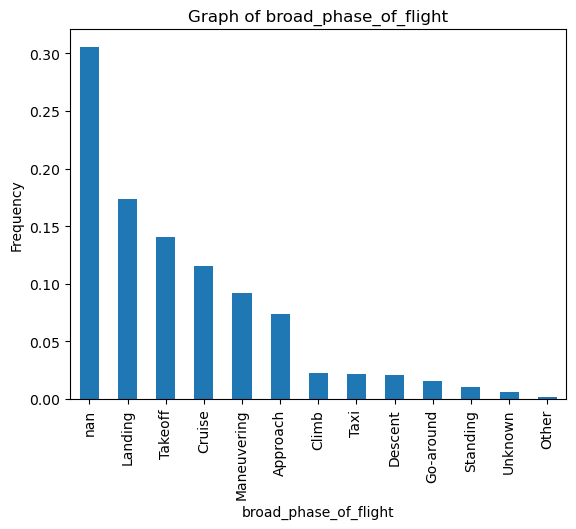

In [30]:
plot_column_data(df,'broad_phase_of_flight', 'bar')

The most important causes of accidents happened either during: landing, takeoff, cruise, maneuvering or approach.
I consider 30% of null values to not be too excesive and believe that the 5 phases mentioned before could be of use. I will not drop these columns

In [31]:
df['broad_phase_of_flight'].fillna('Unknown', inplace=True)

The study of the columns in question have been done and I will now proceed to drop said columns. I will also append to the drop columns the previous id columns that are now unnecessary with the new primary_key column

In [32]:
drop_columns = drop_columns + ['accident_number', 'registration_number', 'event_id']

df = df.drop(drop_columns, axis=1)

In [33]:
df.isnull().sum()/len(df)*100

investigation_type         0.000000
event_date                 0.000000
location                   0.058500
country                    0.254250
injury_severity            1.124999
aircraft_damage            3.593246
make                       0.070875
model                      0.103500
amateur_built              0.114750
number_of_engines          6.844491
engine_type                7.982990
purpose_of_flight          6.965991
total_fatal_injuries      12.826109
total_serious_injuries    14.073732
total_minor_injuries      13.424608
total_uninjured            6.650992
weather_condition          5.053494
broad_phase_of_flight      0.000000
report_status              7.181991
primary_key                1.554748
dtype: float64

**Investigation type**

investigation_type
Accident    0.956418
Incident    0.043582
Name: proportion, dtype: float64



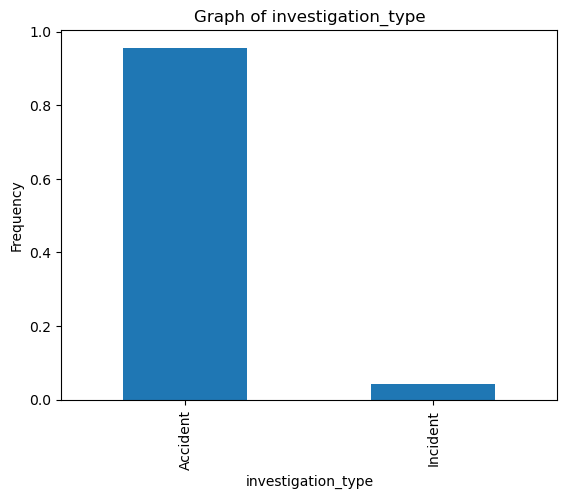

In [34]:
plot_column_data(df,'investigation_type', 'bar')

After doing some reasearch, we have noticed that an accident is a unintentional event that results in harm whereas an incident
although it might be unintentional doesn't necessarily result in harm

Moreover, we can see that all of the registrations in the dataset are all accidents (in 96% of it's totality)

**Event Date**

In [35]:
df['event_date'].min()

'1948-10-24'

In [36]:
df['event_date'].max()

'2022-12-29'

In [37]:
df['event_date'].value_counts(normalize=True, dropna=False)

event_date
1984-06-30    0.000281
1982-05-16    0.000281
2000-07-08    0.000281
1983-08-05    0.000270
1984-08-25    0.000270
                ...   
2014-03-16    0.000011
2014-03-15    0.000011
2014-03-12    0.000011
2014-03-10    0.000011
2022-12-29    0.000011
Name: proportion, Length: 14782, dtype: float64

In [38]:
df['event_date'].isna().any()

False

We have realized that we have accidents or incidents from 1948 to 2022

In [39]:
df['event_date'] = df['event_date'].astype('object')

I would like to investigate the number of accidents per year and month

In [40]:
df['year'] = df['event_date'].map(lambda x:int(x[:4]))
df['year']

0        1948
1        1962
2        1974
3        1977
4        1979
         ... 
88884    2022
88885    2022
88886    2022
88887    2022
88888    2022
Name: year, Length: 88889, dtype: int64

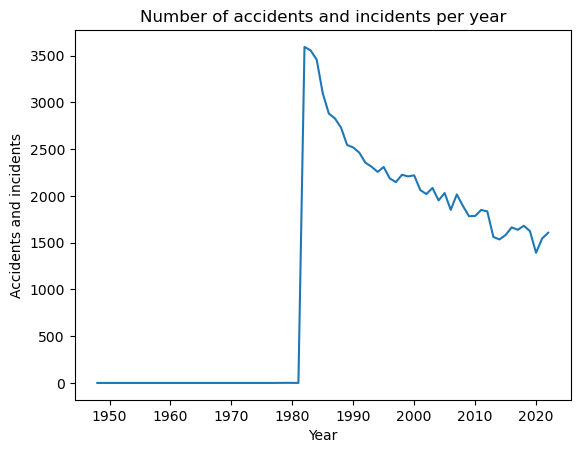

In [41]:
df.groupby('year')['investigation_type'].count().plot(kind='line')

plt.title('Number of accidents and incidents per year')
plt.xlabel('Year')
plt.ylabel('Accidents and incidents')

plt.show()

In [42]:
df[df['year']<1982]

,investigation_type,event_date,location,country,injury_severity,aircraft_damage,make,model,amateur_built,number_of_engines,engine_type,purpose_of_flight,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight,report_status,primary_key,year
0,Accident,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,Stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,SEA87LA080_NC6404,1948
1,Accident,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,LAX94LA336_N5069P,1962
2,Accident,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,Cessna,172M,No,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,NYC07LA005_N5142R,1974
3,Accident,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,Rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,LAX96LA321_N1168J,1977
4,Accident,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,Cessna,501,No,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,CHI79FA064_N15NY,1979
5,Accident,1979-09-17,"BOSTON, MA",United States,Non-Fatal,Substantial,Mcdonnell Douglas,DC9,No,2.0,Turbo Fan,NaN,NaN,NaN,1.0,44.0,VMC,Climb,Probable Cause,NYC79AA106_CF-TLU,1979
6,Accident,1981-08-01,"COTTON, MN",United States,Fatal(4),Destroyed,Cessna,180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,IMC,Unknown,Probable Cause,CHI81LA106_N4988E,1981


As can be seen there is only 7 rows of data before 1983. I will proceed to eliminate these rows 

In [43]:
df = df[df['year']>1982]

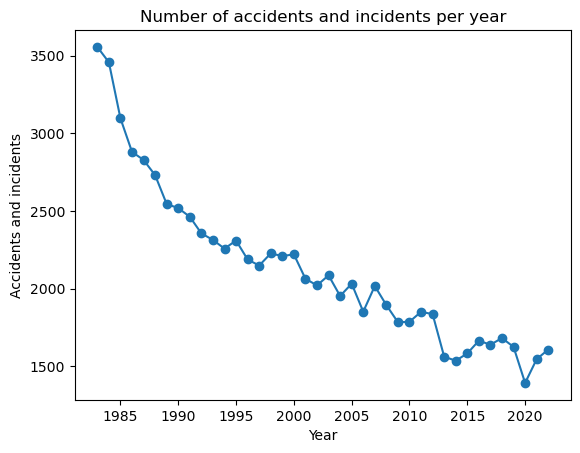

In [44]:
df.groupby('year')['investigation_type'].count().plot(kind='line', marker='o')

plt.title('Number of accidents and incidents per year')
plt.xlabel('Year')
plt.ylabel('Accidents and incidents')

plt.show()

In the passing of time, it is visible that the number of accidents have reduced gradually. In 2020, there is a noticeable drop in the number of accidents, possible due to the Covid-19 restrictions period

I will now study the number of accidents per month

In [45]:
df['month'] = df['event_date'].map(lambda x:x[5:7])
df['month']

3600     01
3601     01
3602     01
3603     01
3604     01
         ..
88884    12
88885    12
88886    12
88887    12
88888    12
Name: month, Length: 85289, dtype: object

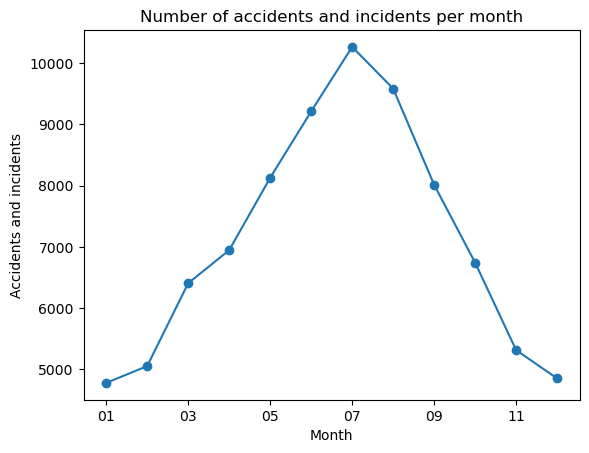

In [46]:
df.groupby('month')['investigation_type'].count().plot(kind='line', marker='o')

plt.title('Number of accidents and incidents per month')
plt.xlabel('Month')
plt.ylabel('Accidents and incidents')

plt.show()

The information shows that there are more accidents and incidents during the summer period which is normal as there tends to be more flights during that period as can be seen in the following studies:

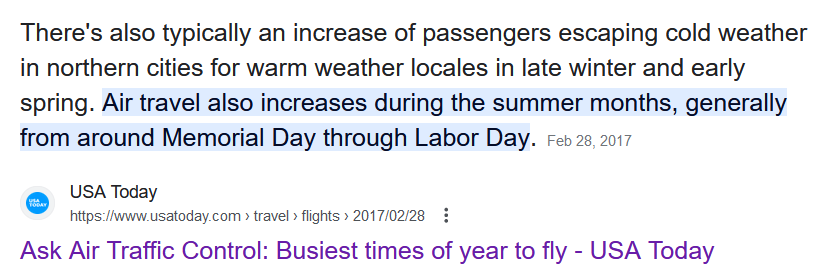

**Country**

country
United States                       0.922475
Brazil                              0.004385
Canada                              0.004209
Mexico                              0.004197
United Kingdom                      0.004033
                                      ...   
Seychelles                          0.000012
Palau                               0.000012
Libya                               0.000012
Saint Vincent and the Grenadines    0.000012
Turks and Caicos Islands            0.000012
Name: proportion, Length: 220, dtype: float64



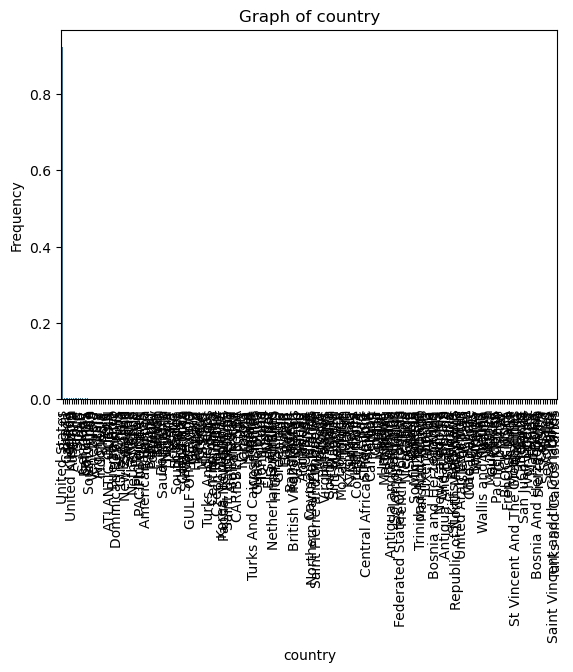

In [47]:
plot_column_data(df,'country', 'bar')

The majority of the events occur in USA. I will delete the rows where the country is not USA 

In [48]:
df = df[df['country']=='United States']

**Injury severity**

In [49]:
df['injury_severity'].value_counts(normalize=True, dropna=False)

injury_severity
Non-Fatal      0.788896
Fatal(1)       0.070656
Fatal          0.045197
Fatal(2)       0.041334
Incident       0.022294
Fatal(3)       0.012024
Fatal(4)       0.008262
Minor          0.002580
Fatal(5)       0.002110
Serious        0.001945
NaN            0.001373
Fatal(6)       0.001335
Fatal(7)       0.000432
Fatal(8)       0.000280
Fatal(10)      0.000216
Unavailable    0.000191
Fatal(9)       0.000102
Fatal(14)      0.000064
Fatal(11)      0.000064
Fatal(12)      0.000051
Fatal(17)      0.000038
Fatal(13)      0.000038
Fatal(18)      0.000038
Fatal(25)      0.000038
Fatal(82)      0.000025
Fatal(23)      0.000025
Fatal(20)      0.000025
Fatal(34)      0.000025
Fatal(31)      0.000013
Fatal(65)      0.000013
Fatal(19)      0.000013
Fatal(44)      0.000013
Fatal(64)      0.000013
Fatal(21)      0.000013
Fatal(92)      0.000013
Fatal(265)     0.000013
Fatal(228)     0.000013
Fatal(49)      0.000013
Fatal(70)      0.000013
Fatal(88)      0.000013
Fatal(15)      0.000013


In [50]:
df['injury_severity'] = df['injury_severity'].astype('category')

I am going to group all the Fatal injuries. First I'll change the type of the column to categorical

In [51]:
df['injury_severity'] = df['injury_severity'].map(lambda x: 'Fatal' if isinstance(x, str) and 'Fatal' in x else x)

injury_severity
Fatal          0.971618
Incident       0.022294
Minor          0.002580
Serious        0.001945
NaN            0.001373
Unavailable    0.000191
Name: proportion, dtype: float64



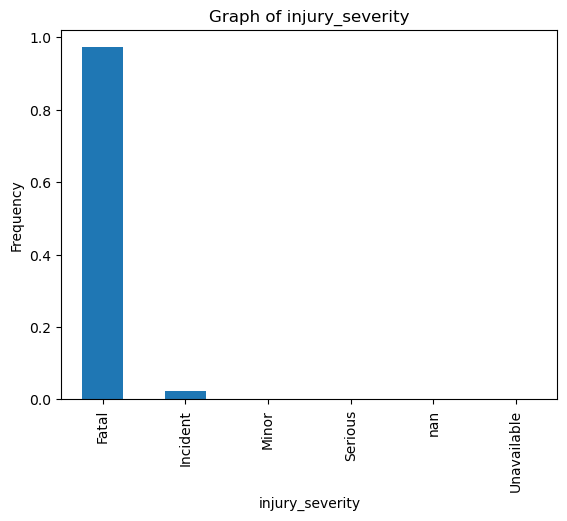

In [52]:
plot_column_data(df,'injury_severity', 'bar')

**'total_fatal_injuries', 'total_serious_injuries', 'total_minor_injuries', 'total_uninjured' looking at their frequencies**

total_fatal_injuries
Zero           0.682220
One or More    0.182684
Unknown        0.135097
Name: proportion, dtype: float64



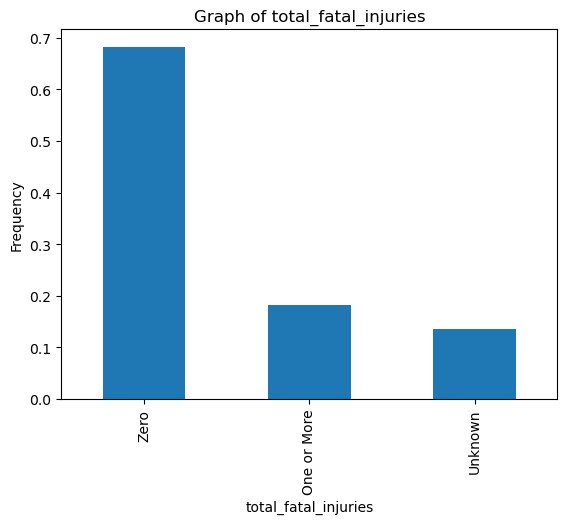

total_serious_injuries
Zero           0.705009
One or More    0.150781
Unknown        0.144210
Name: proportion, dtype: float64



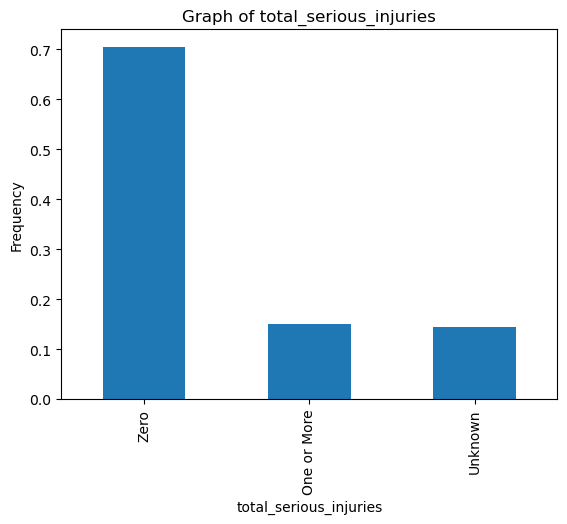

total_minor_injuries
Zero           0.685639
One or More    0.178349
Unknown        0.136012
Name: proportion, dtype: float64



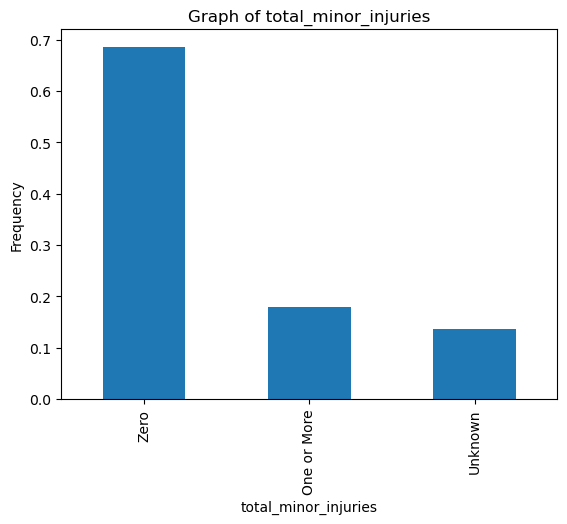

total_uninjured
One or More    0.615707
Zero           0.320793
Unknown        0.063500
Name: proportion, dtype: float64



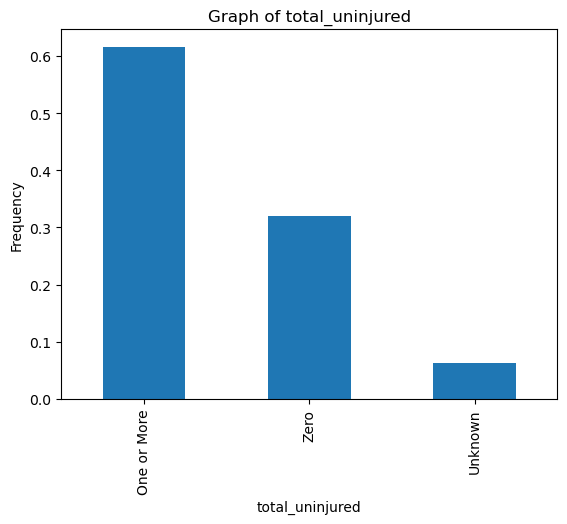

In [53]:
columns_of_injuries = ['total_fatal_injuries', 'total_serious_injuries', 'total_minor_injuries', 'total_uninjured']

for columns in columns_of_injuries:
    # First, I am going to call categorize_data function to categorize the values in either 'Zero', 'One or More' or 'Unknown'
    df[columns] = df[columns].map(categorize_data)
    
    # Second, I will represent the results of all the columns in bar graphs and their value counts
    plot_column_data(df,columns, 'bar')

The graphs above give a view of the injuries. In particular, in the value counts one can see that around 30% of the accidents in 
the dataset have had injuries

I will eliminate the rows where injury_severity has 'Fatal' but don't have a number in the corresponding value of total_fatal_injuries

In [54]:
df = df[~((df['injury_severity']=='Fatal') & (df['total_fatal_injuries']=='Zero'))]

I will eliminate the rows where injury_severity has 'Non-Fatal' but have a number in the corresponding value of total_fatal_injuries

In [55]:
df = df[~((df['injury_severity']=='Non-Fatal') & (df['total_fatal_injuries']!='Zero'))]

Given that it is of my interest to study the fatal injuries above all, I will categorize injury_severity to either fatal or non-fatal. 

injury_severity
Fatal        0.916747
Non-fatal    0.083253
Name: proportion, dtype: float64



<>:1: SyntaxWarning: "is not" with 'str' literal. Did you mean "!="?
<>:1: SyntaxWarning: "is not" with 'str' literal. Did you mean "!="?
C:\Users\Usuario\AppData\Local\Temp\ipykernel_22212\588282316.py:1: SyntaxWarning: "is not" with 'str' literal. Did you mean "!="?
  df['injury_severity'] = df['injury_severity'].map(lambda x: 'Non-fatal' if x is not 'Fatal' else x)


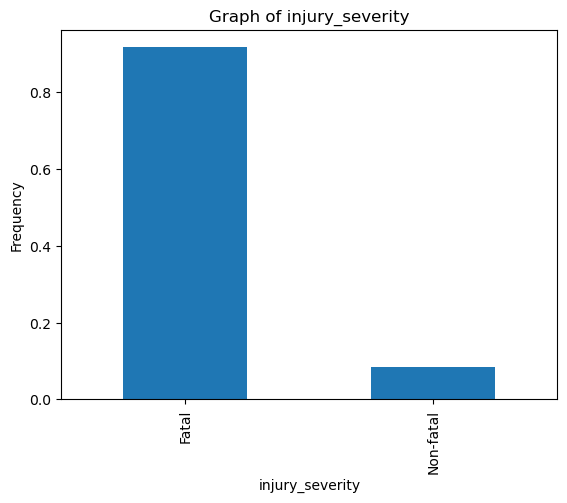

In [56]:
df['injury_severity'] = df['injury_severity'].map(lambda x: 'Non-fatal' if x is not 'Fatal' else x)
plot_column_data(df,'injury_severity', 'bar')

I decide to select the registrations of total fatal injuries and of total serious injuries that are 'One or More' and study those from now onwards. We don't consider minor injuries because they might be negligible

In [57]:
df = df[(df['total_fatal_injuries']=='One or More') | (df['total_serious_injuries']=='One or More')]

In [58]:
df = df.reset_index(drop=True)
df

,investigation_type,event_date,location,country,injury_severity,aircraft_damage,make,model,amateur_built,number_of_engines,engine_type,purpose_of_flight,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight,report_status,primary_key,year,month
0,Accident,1983-01-02,"GENOA CITY, WI",United States,Fatal,Destroyed,North American,T-6G,No,1.0,Reciprocating,Personal,One or More,Zero,Zero,Zero,VMC,Maneuvering,Probable Cause,CHI83FA069_N3168G,1983,01
1,Accident,1983-01-02,"BEAUFORT, SC",United States,Fatal,Destroyed,Piper,PA-24-250,No,1.0,Reciprocating,Personal,One or More,Zero,Zero,Zero,IMC,Cruise,Probable Cause,ATL83FA081_N8066P,1983,01
2,Accident,1983-01-02,"HANCOCK, MD",United States,Fatal,Substantial,Cessna,172F,No,1.0,Reciprocating,Personal,One or More,One or More,One or More,Zero,VMC,Maneuvering,Probable Cause,ATL83FIG03_N8515U,1983,01
3,Accident,1983-01-03,"WILLARD, WA",United States,Fatal,Destroyed,Cessna,T303,No,2.0,Reciprocating,Business,One or More,Zero,Zero,Zero,IMC,Climb,Probable Cause,SEA83FA038_N6087C,1983,01
4,Accident,1983-01-03,"AVALON, CA",United States,Fatal,Destroyed,Piper,PA-28-161,No,1.0,Reciprocating,Personal,One or More,One or More,Zero,Zero,VMC,Go-around,Probable Cause,LAX83FUA02_N2239M,1983,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16048,Accident,2022-12-17,"Cottonwood, CA",United States,Non-fatal,NaN,ROYSE RALPH L,GLASAIR,No,NaN,NaN,Personal,Zero,One or More,Zero,Zero,NaN,Unknown,NaN,WPR23LA074_N9YA,2022,12
16049,Accident,2022-12-21,"Auburn Hills, MI",United States,Non-fatal,NaN,CESSNA,172F,No,NaN,NaN,Personal,Zero,One or More,Zero,Zero,NaN,Unknown,NaN,CEN23LA067_N8786U,2022,12
16050,Accident,2022-12-21,"Reserve, LA",United States,Non-fatal,NaN,GRUMMAN AMERICAN AVN. CORP.,AA-5B,No,NaN,NaN,Instructional,Zero,One or More,Zero,One or More,NaN,Unknown,NaN,CEN23LA068_N321GD,2022,12
16051,Accident,2022-12-26,"Annapolis, MD",United States,Non-fatal,NaN,PIPER,PA-28-151,No,NaN,NaN,Personal,Zero,One or More,Zero,Zero,NaN,Unknown,NaN,ERA23LA093_N1867H,2022,12


**Aircraft Damage**

aircraft_damage
Destroyed      0.652900
Substantial    0.317635
NaN            0.019934
Minor          0.008846
Unknown        0.000685
Name: proportion, dtype: float64



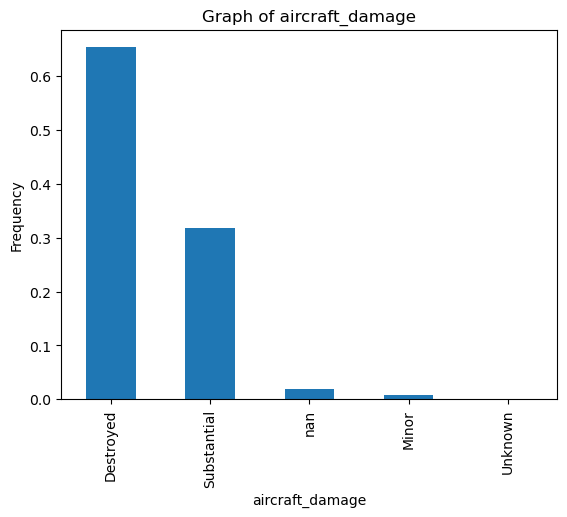

In [59]:
plot_column_data(df,'aircraft_damage', 'bar')

In [60]:
df['aircraft_damage'].fillna('Unknown', inplace=True)

As we can see the majority of the damages are substantial and destroyed. I will proceed with further investigations

**Make**

In [61]:
df['make'].value_counts(normalize=True, dropna=False)

make
Cessna                   0.211985
Piper                    0.148695
Beech                    0.073133
CESSNA                   0.040304
PIPER                    0.027970
                           ...   
Bensen Aircraft Corp.    0.000062
Boykin B J               0.000062
Motley Vans              0.000062
Madsen                   0.000062
ROYSE RALPH L            0.000062
Name: proportion, Length: 2846, dtype: float64

In [62]:
df['make'].isna().sum()

3

In [63]:
# Replace null values with 'Unknown'
df['make'].fillna('Unknown', inplace=True)

I will change the values of the make column to lower case letters and ensure they're all grouped correctly

In [64]:
df['make'] = df['make'].str.capitalize()

I am going to joint Douglas with Mcdonnell douglas because they're the same aircraft company

In [65]:
df['make'] = df['make'].map(lambda x: 'Douglas' if x in ['Mcdonnell douglas','Douglas'] else x)

I will proceed to create a list of the top 10 makers with accidents 

In [66]:
top_10_make = df['make'].value_counts(normalize=True, dropna=False).head(10)*100
top_10_make

make
Cessna            25.228929
Piper             17.666480
Beech              8.851928
Bell               2.578957
Mooney             2.230113
Bellanca           1.345543
Robinson           1.002928
Boeing             0.822276
Hughes             0.797359
North american     0.735065
Name: proportion, dtype: float64

Text(0.5, 1.0, 'Top 10 Markers per Percentage of Accidents')

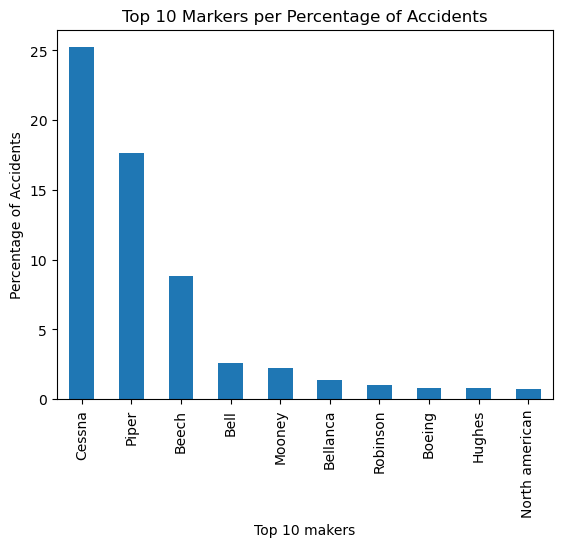

In [67]:
plt.figure()
top_10_make.plot(kind='bar')
plt.xlabel('Top 10 makers')
plt.ylabel('Percentage of Accidents')
plt.xticks(rotation=90)
plt.title('Top 10 Markers per Percentage of Accidents')

The above makers are the ones with the highest number of accidents. 
It's noticeable that Cessna, Piper and Beech are the highest of all

**Model**

In [68]:
df['model'].value_counts(normalize=True, dropna=False)

model
152          0.014764
172N         0.011774
PA-28-140    0.011026
A36          0.009095
172          0.008908
               ...   
LJ-60        0.000062
172 F        0.000062
DN-1         0.000062
L-39CT       0.000062
EC 130 T2    0.000062
Name: proportion, Length: 4448, dtype: float64

In [69]:
df['model'].isna().sum()

7

I don't believe to be able to extract much information from the model column

**Amateur Built**

In [70]:
df['amateur_built'].value_counts(normalize=True, dropna=False)

amateur_built
No     0.846633
Yes    0.152869
NaN    0.000498
Name: proportion, dtype: float64

As can be seen most of the accident cases were commercial trips

**Number of engines**

In [71]:
df['number_of_engines'].value_counts(normalize=True, dropna=False)

number_of_engines
1.0    0.798854
2.0    0.160780
NaN    0.022488
0.0    0.013269
4.0    0.002990
3.0    0.001620
Name: proportion, dtype: float64

In [72]:
# I will proceed to replace the null values with the mode
df['number_of_engines'].fillna(df['number_of_engines'].mode()[0], inplace=True)

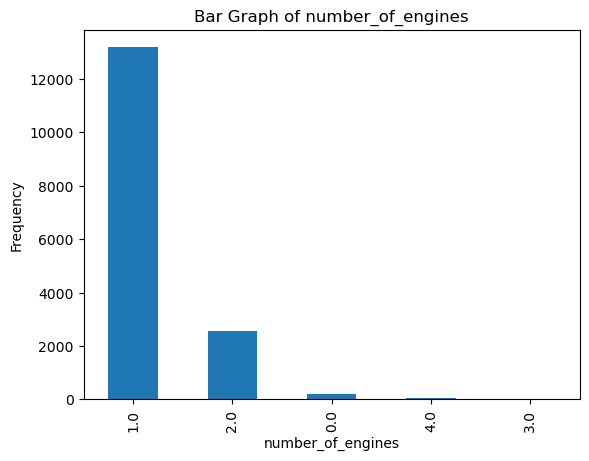

In [73]:
plot_bar_graph_for_columns('number_of_engines')

As is clearly visible, the majority of the accidents (in an 80% of the cases) happened with aircrafts that only had one engine

**Engine type**

engine_type
Reciprocating    0.814365
NaN              0.056687
Turbo Prop       0.048278
Turbo Shaft      0.046596
Turbo Fan        0.015511
Unknown          0.009282
Turbo Jet        0.009095
Electric         0.000125
Hybrid Rocket    0.000062
Name: proportion, dtype: float64



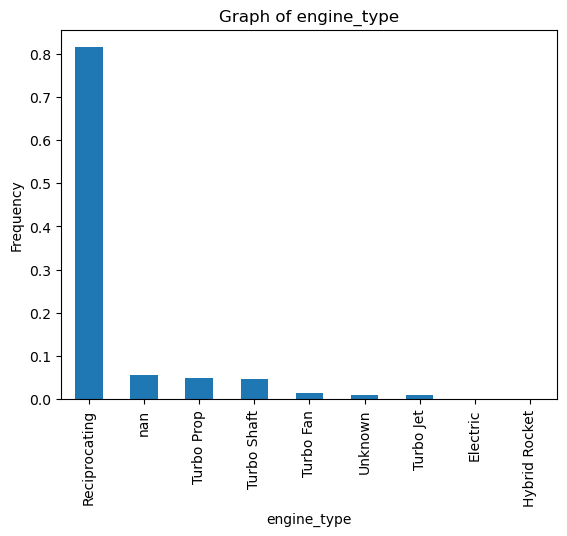

In [74]:
plot_column_data(df,'engine_type', 'bar')

In [75]:
# Replace unknown values with 'Unknown' and replace na with 'Unknown'

df['engine_type'] = df['engine_type'].replace('UNK', 'Unknown')
df['engine_type'].fillna('Unknown', inplace=True)

engine_type
Reciprocating    0.814365
Unknown          0.065969
Turbo Prop       0.048278
Turbo Shaft      0.046596
Turbo Fan        0.015511
Turbo Jet        0.009095
Electric         0.000125
Hybrid Rocket    0.000062
Name: proportion, dtype: float64



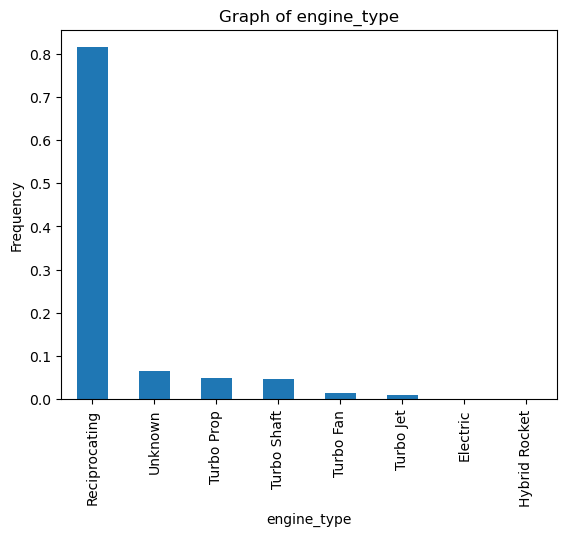

In [76]:
plot_column_data(df,'engine_type', 'bar')

An overwhealming majority of the accidents (ie in 81% of the cases) the engine type of the aircraft was reciprocating

**Purpose of Flight**

In [77]:
df['purpose_of_flight'].value_counts(normalize=True, dropna=False)

purpose_of_flight
Personal                     0.649100
Instructional                0.066343
Unknown                      0.063041
Business                     0.058556
Aerial Application           0.031770
NaN                          0.029029
Positioning                  0.025042
Other Work Use               0.017068
Aerial Observation           0.011462
Public Aircraft              0.010901
Ferry                        0.007787
Executive/corporate          0.007413
Flight Test                  0.006292
Skydiving                    0.003800
Air Race/show                0.002741
External Load                0.001931
Air Race show                0.001557
Banner Tow                   0.001308
Public Aircraft - Federal    0.001308
Glider Tow                   0.000997
Public Aircraft - State      0.000872
Public Aircraft - Local      0.000685
Firefighting                 0.000623
ASHO                         0.000311
Air Drop                     0.000062
Name: proportion, dtype: float64

In [78]:
# Let's fill null values with unknown

df['purpose_of_flight'].fillna('Unknown', inplace=True)

I am going to look at the top 10 of the instances

In [79]:
top_10_purpose_of_flight = df['purpose_of_flight'].value_counts(normalize=True, dropna=False).head(10)*100
top_10_purpose_of_flight

purpose_of_flight
Personal              64.909986
Unknown                9.207002
Instructional          6.634274
Business               5.855603
Aerial Application     3.176976
Positioning            2.504205
Other Work Use         1.706846
Aerial Observation     1.146203
Public Aircraft        1.090139
Ferry                  0.778671
Name: proportion, dtype: float64

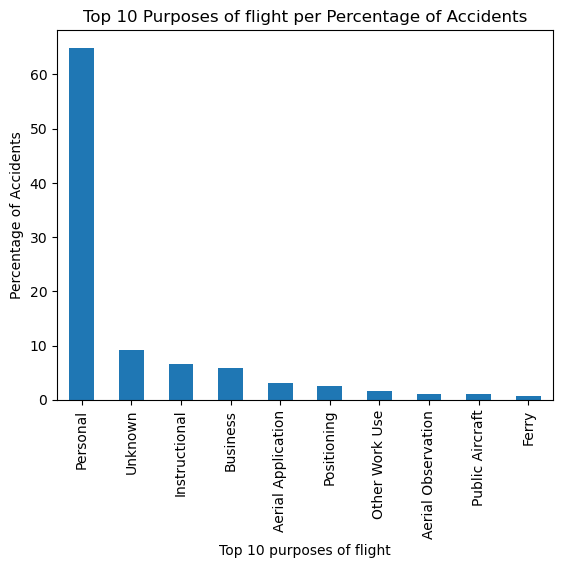

In [80]:
plt.figure()
top_10_purpose_of_flight.plot(kind='bar')
plt.xlabel('Top 10 purpose''s of flight')
plt.ylabel('Percentage of Accidents')
plt.xticks(rotation=90)
plt.title('Top 10 Purpose''s of flight per Percentage of Accidents');

The majority of the accidents happened under personal reasons apparently. This doesn't give much insight to our study

**Weather condition**

In [81]:
df['weather_condition'].value_counts(normalize=True, dropna=False)

weather_condition
VMC    0.779044
IMC    0.192550
UNK    0.017006
NaN    0.008534
Unk    0.002866
Name: proportion, dtype: float64

In [82]:
# Let's replace Unk to UNK and all the null values let's call them: UNK (this means 'Unknown')

df['weather_condition'] = df['weather_condition'].replace('Unk','UNK')
df['weather_condition'].fillna('UNK', inplace=True)

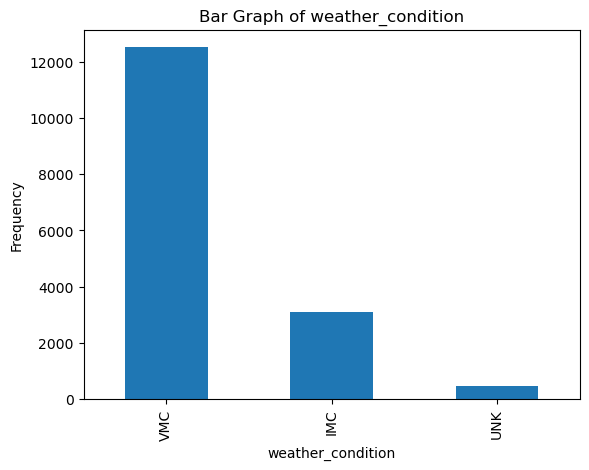

In [83]:
plot_bar_graph_for_columns('weather_condition')

The dataset contains in its majority VMC weather conditions (ie more than 91% of the data) which says that the flight conditions
are good enough for pilots to fly using only visual cues. There is a remaining 7% of flights that were IMC and that are weather conditions that are so poor that pilots cannot safely fly using only visual cues.

**Report Status**

In [84]:
df['report_status'].value_counts(normalize=True, dropna=False)

report_status
Probable Cause                                                                                                                                                                                                                                                                                            0.764219
NaN                                                                                                                                                                                                                                                                                                       0.051019
Factual                                                                                                                                                                                                                                                                                                   0.000934
An in-flight loss of control for undetermined reasons.           

In [85]:
# df['report_status'].unique()

In [86]:
(df['report_status'].isnull().sum()/len(df['report_status']))*100 

5.101850121472622

I'm going to create a new category that groups pilot's faults

In [87]:
df['report_status'] = df['report_status'].map(lambda x: 'pilot failure' if isinstance(x,str) and 'pilot' in x else x)

In [88]:
df['report_status'].unique()

array(['Probable Cause', 'Factual', 'Preliminary', 'Foreign',
       'pilot failure',
       'An in-flight loss of control and an uncontrolled descent into terrain for undetermined reasons.',
       "The flight instructor's failure to maintain control of the airplane, which resulted in an inadvertent stall while maneuvering.",
       'The loss of pitch control during cruise flight resulting from the separation of the stabilator trim actuator due to inadequate maintenenace.',
       "The improper installation of the fuel pump, leading to a fatigue failure of the pump's lever arm and subsequent loss of engine power. Contributing to the accident was the lack of suitable terrain for a forced landing.",
       'Airplane wing-structure damage sustained during impact with one or more large birds (American white pelicans), which resulted in a loss of control of the airplane.',
       "The flight instructor's failure to maintain aircraft control while maneuvering during a simulated engine failu

I'm going to create a new category that groups collisions

In [89]:
df['report_status'] = df['report_status'].map(lambda x: 'Collision' if isinstance(x,str) and 'collision' in x else x)

In [90]:
df['report_status'].nunique()

418

There are still 4358 unique cases in the report_status column and the majority of the explanations are not very clear

## 3.7 Results 

**First business recommendation:** Invest in aircrafts with more than one engine. The dataset shows that 82% of the accidents happened with aircrafts that had only 1 engine. 

This implies that aircraft with more than one engine may have a better safety record and could represent a safer investment.


C:\Users\Usuario\anaconda3\envs\aircraft_env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Usuario\anaconda3\envs\aircraft_env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


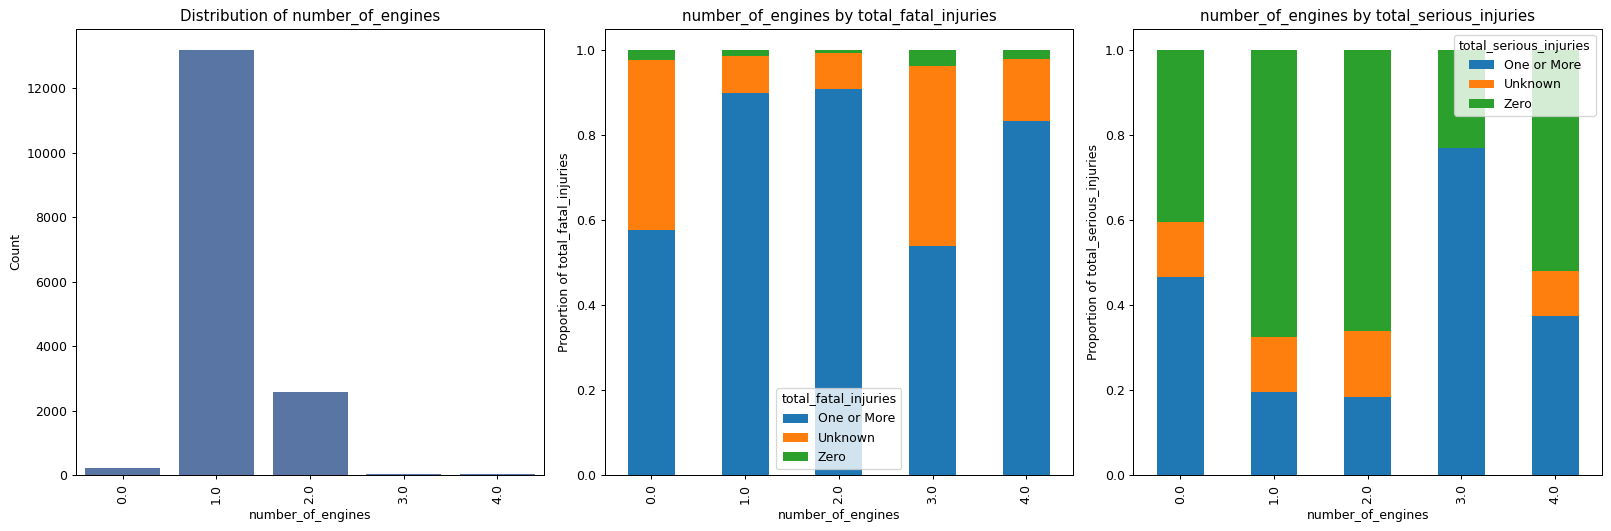

In [91]:
plot_feature(df, 'number_of_engines', 'bar', 'total_fatal_injuries', 'total_serious_injuries')

number_of_engines
1.0    0.821342
2.0    0.160780
0.0    0.013269
4.0    0.002990
3.0    0.001620
Name: proportion, dtype: float64



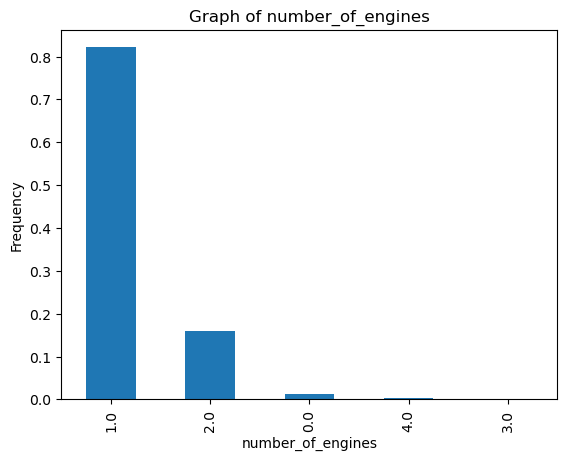

In [92]:
plot_column_data(df,'number_of_engines', 'bar')

**Second business recommendation:** Do not invest in aircrafts with a reciprocating engine type. The dataset shows that 81.4% of the accidents happened with aircrafts that had this type of engine. 

Investing in aircraft with alternative engine types might reduce risk exposure.


engine_type
Reciprocating    0.814365
Unknown          0.065969
Turbo Prop       0.048278
Turbo Shaft      0.046596
Turbo Fan        0.015511
Turbo Jet        0.009095
Electric         0.000125
Hybrid Rocket    0.000062
Name: proportion, dtype: float64



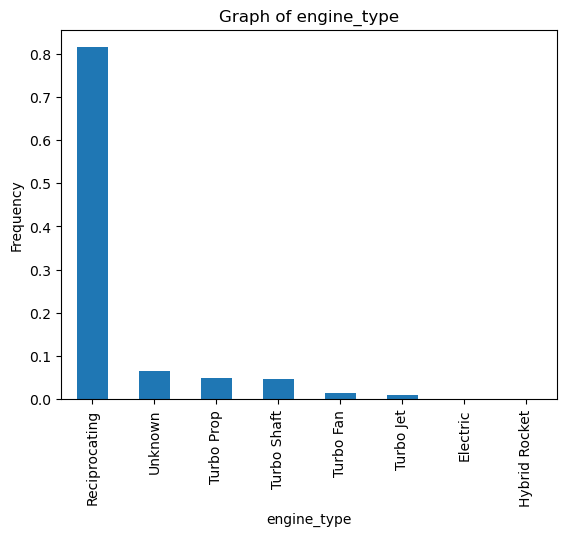

In [93]:
plot_column_data(df,'engine_type', 'bar')

**Third business recommendation:** Be weary of investing in certain aircraft makers. Be very carefull in investing on 'Cessna', 'Piper' and 'Beech' as their aircrafts combined have had around 50% of the fatal and serious accidents. In particular, 'Cessna' has 25%, 'Piper' 17.7%, and 'Beech' 8.8%. The rest of the makers are involved in less than 2.6% of the fatal and serious accidents. 

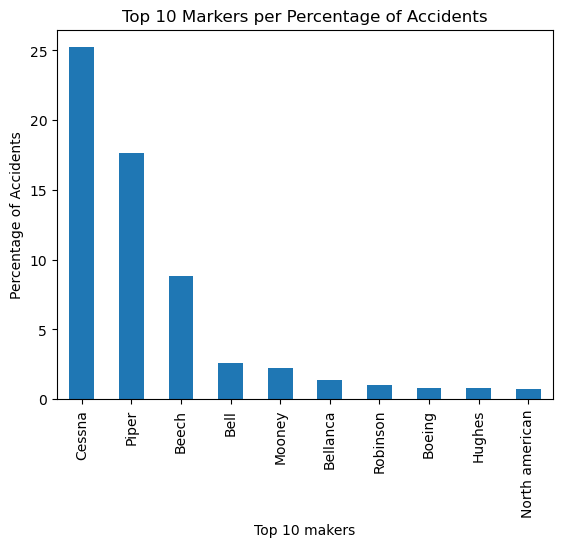

In [94]:
plt.figure()
top_10_make.plot(kind='bar')
plt.xlabel('Top 10 makers')
plt.ylabel('Percentage of Accidents')
plt.xticks(rotation=90)
plt.title('Top 10 Markers per Percentage of Accidents');

A prudent investment strategy might be to diversify into manufacturers with lower accident rates or to further scrutinize the causes of these accidents to determine if they are related to maintenance practices, specific models, or flight circumstances that could be mitigated.

Considering the above recommendations, this would be the resulting dataset to consider for aircraft investment

In [95]:
df_filtered = df[(df['number_of_engines']!=1) & (df['engine_type']!='Recriprocating') & (df['make']!='Cessna') & (df['make']!='Piper') & (df['make']!='Beech')]
df_filtered.reset_index(drop=True, inplace=True)

In [96]:
df_filtered.columns

Index(['investigation_type', 'event_date', 'location', 'country',
       'injury_severity', 'aircraft_damage', 'make', 'model', 'amateur_built',
       'number_of_engines', 'engine_type', 'purpose_of_flight',
       'total_fatal_injuries', 'total_serious_injuries',
       'total_minor_injuries', 'total_uninjured', 'weather_condition',
       'broad_phase_of_flight', 'report_status', 'primary_key', 'year',
       'month'],
      dtype='object')

C:\Users\Usuario\anaconda3\envs\aircraft_env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Usuario\anaconda3\envs\aircraft_env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


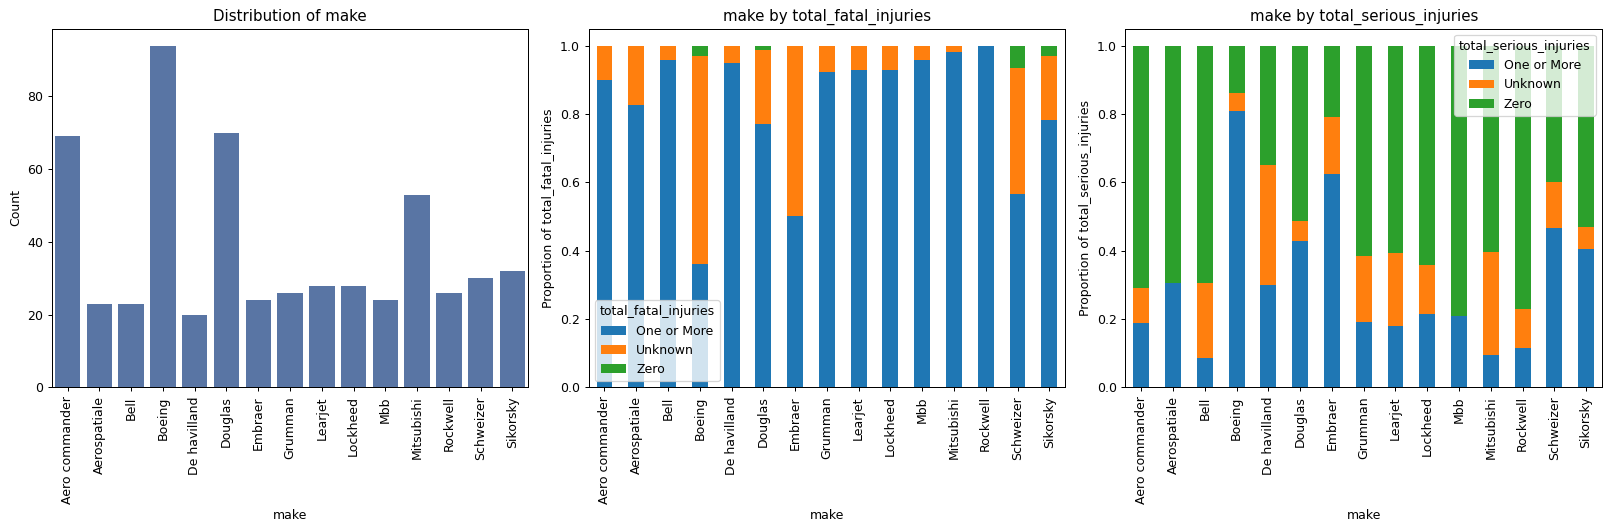

In [97]:
plot_feature(df_filtered,'make', 'categorical', 'total_fatal_injuries', 'total_serious_injuries')

Looking at the results, I would recommend to invest in aircrafts made by Schweizer because they're the ones with the lowest numbers of total fatal injuries and are thus, a priori, more reliable

## 3.8 Write the Results

I will export the dataframe to an excel

In [98]:
df_filtered.to_csv("../results_data/aircraft_safety_final_dataset.csv", index=False)